In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib 

Using matplotlib backend: module://matplotlib_inline.backend_inline


In [2]:
a = np.load('allSignal.npy')

In [3]:
e = np.load('allError.npy')

In [4]:
p = np.load('allInputs.npy',allow_pickle=True)

In [24]:
parameters = []
for setOfParams in p:
    parameters.append(setOfParams[0]['maff']['diameterParams'][0])
parameters = np.array(parameters)

In [6]:
goodIdx = np.argsort(e.flatten())

In [17]:
p.shape

(199, 1)

In [8]:
time = np.linspace(-.5,.5,49997)*1e3

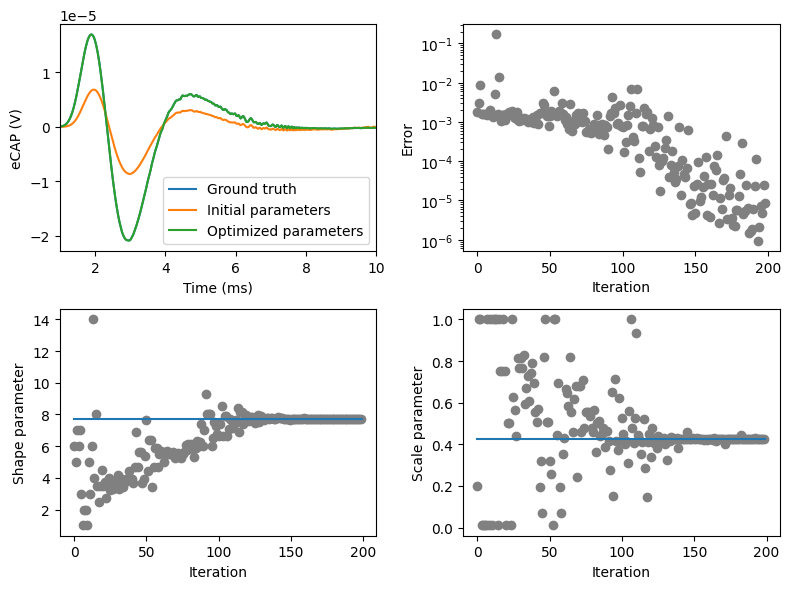

In [36]:
plt.figure(figsize=(8,6))



plt.subplot(2,2,1)

groundTruth = np.load('../optimizeFractions_sweep/groundTruth/Signals_Stim_500.npy')
original = a[0]
optimal = a[goodIdx[0]]

plt.plot(time,groundTruth[0,0])
plt.plot(time,original[0,0])
plt.plot(time,optimal[0,0])


plt.xlabel('Time (ms)')
plt.ylabel('eCAP (V)')

plt.legend(['Ground truth','Initial parameters','Optimized parameters'])

plt.xlim([1,10])

plt.tight_layout()

plt.subplot(2,2,2)

plt.semilogy(np.arange(len(e)),e,'o',color='grey')
plt.xlabel('Iteration')
plt.ylabel('Error')

plt.subplot(2,2,3)

plt.plot(parameters[:,0],'o',color='grey')
plt.plot(np.array([0,len(parameters)]),[7.72,7.72])
plt.xlabel('Iteration')
plt.ylabel('Shape parameter')

plt.subplot(2,2,4)

plt.plot(parameters[:,1],'o',color='grey')
plt.plot(np.array([0,len(parameters)]),[0.425,0.425])
plt.xlabel('Iteration')
plt.ylabel('Scale parameter')

plt.tight_layout()

plt.savefig('Optimization.png',dpi=600)

In [11]:
from vagusNerve.nerveSetup import gammaDist
from vagusNerve.nerveSetup import loadDiameterDistribution
from vagusNerve.utils import getDiameters
import quantities as pq
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit

In [12]:
d = getDiameters()

In [13]:
d = d / pq.m # Removes units for compatibility reasons

binSizeSamples = np.diff(d)[0]

empiricalDiams, empiricalProbs = loadDiameterDistribution('maff')

binSizeData = np.diff(empiricalDiams)[0] # Taking the first element ignores sloppy digitization towards the far end

binRatio = binSizeSamples/binSizeData

interp = interp1d(empiricalDiams,empiricalProbs,bounds_error=False,fill_value='extrapolate')

interpD = interp(d)

interpD[np.where(interpD<0)]=0


paramsMaff = curve_fit(gammaDist,d*1e6,interpD*10,p0=[9,0.5],bounds=(0,np.inf))

In [14]:
empiricalDiams, empiricalProbs = loadDiameterDistribution('meff')

binSizeData = np.diff(empiricalDiams)[0] # Taking the first element ignores sloppy digitization towards the far end

binRatio = binSizeSamples/binSizeData

interp = interp1d(empiricalDiams,empiricalProbs,bounds_error=False,fill_value='extrapolate')

interpD = interp(d)

interpD[np.where(interpD<0)]=0


paramsMeff = curve_fit(gammaDist,d*1e6,interpD*10,p0=[9,0.5],bounds=(0,np.inf))

In [15]:
paramsMaff

(array([7.72427782, 0.42498444]),
 array([[ 1.13256639e-02, -6.45438444e-04],
        [-6.45438444e-04,  3.86336358e-05]]))

In [16]:
paramsMeff

(array([9.28229805, 0.35998345]),
 array([[ 1.43395417e-02, -5.72392447e-04],
        [-5.72392447e-04,  2.37991868e-05]]))

In [32]:
for i in range(len(p)):
    print(p[i][0]['maff']['diameterParams'][0])

[6.  0.2]
[5. 1.]
[7. 1.]
[6.   0.01]
[7.   0.01]
[3.   0.01]
[1.   0.01]
[2. 1.]
[1. 1.]
[6. 1.]
[2.   0.01]
[4.   0.01]
[1.75 0.26]
[1.   0.51]
[1.75 0.01]
[1.    0.135]
[1.375 0.01 ]
[1.0625 0.385 ]
[1.      0.04125]
[1.      0.16625]
[1.1875 0.01  ]
[1.        0.0490625]
[1.05859375 0.07640625]
[1.06640625 0.01      ]
[1.04980469 0.02660156]
[1.04394531 0.01292969]
[1.00292969 0.01      ]
[1.01098633 0.01976562]
[1.         0.03124023]
[1.00610352 0.01      ]
[1.00823975 0.01531006]
[1.01104736 0.01006104]
[1.         0.02104736]
[1.00276184 0.01276184]
[1.00210571 0.01      ]
[1.00003052 0.01007629]
[1.00073242 0.01069046]
[1.         0.01195694]
[1.00195694 0.01194931]


In [16]:
p[0]

array([{'maff': {'diameterParams': array([[6. , 0.2],
              [6. , 0.2],
              [6. , 0.2],
              [6. , 0.2],
              [6. , 0.2],
              [6. , 0.2],
              [6. , 0.2],
              [6. , 0.2],
              [6. , 0.2],
              [6. , 0.2],
              [6. , 0.2],
              [6. , 0.2],
              [6. , 0.2],
              [6. , 0.2],
              [6. , 0.2],
              [6. , 0.2],
              [6. , 0.2],
              [6. , 0.2],
              [6. , 0.2],
              [6. , 0.2],
              [6. , 0.2],
              [6. , 0.2],
              [6. , 0.2],
              [6. , 0.2],
              [6. , 0.2],
              [6. , 0.2],
              [6. , 0.2],
              [6. , 0.2],
              [6. , 0.2],
              [6. , 0.2],
              [6. , 0.2],
              [6. , 0.2],
              [6. , 0.2],
              [6. , 0.2],
              [6. , 0.2],
              [6. , 0.2],
              [6. , 0.2],
          

(0.0, 10.0)

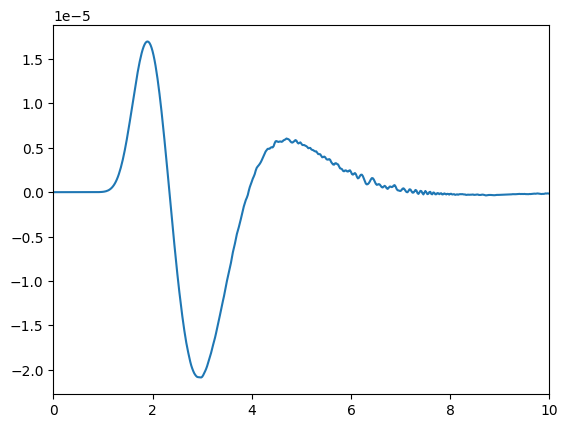

In [16]:
plt.figure()
plt.plot(time,groundTruth[0,0])
plt.xlim([0,10])